<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/ProyectoML/Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [5]:
def Plotter(e):

  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)
  ax.set_title('{:.0f}'.format(e),fontsize=10)

  return ax,ax1

In [24]:
class Robot:

  # Definir el contructor
  def __init__(self, f, Id=0):
    self.Id = Id
    self.f = f

    # Posicion robot
    self.r = np.random.uniform(-1,1)

  def Fitness(self):
    return self.f(self.r)

  def Mutate(self):
    self.r += np.random.normal(0,0.1)

In [25]:
f = lambda x: x**2 + 10*np.sin(x)

In [26]:
r1 = Robot(f)
r1.f(0.6)

6.006424733950354

In [27]:
def GetRobots(N):

  Robots = []
  for i in range(N):
    r = Robot(f,i)
    Robots.append(r)

  return Robots


In [28]:
Robots = GetRobots(10)

In [29]:
x1 = np.linspace(-2,2,50)

In [33]:
def Genetic(Robots, epochs = 30):

  for e in range(epochs):

    clear_output(wait = True)

    ax,_ = Plotter(e)

    for i, p in enumerate(Robots):
      Robots[i].Fitness()

    R = np.array([])
    for i, p in enumerate(Robots):
      position = p.r
      R = np.append(R,position)

    for i in range(len(Robots)):
      Robots[i].Mutate()
    #print(position)

    score = [ (p.Fitness, p) for p in Robots ]
    print(score)

    ax.scatter(R, f(R))
    ax.plot(x1,f(x1))

    plt.show()

[(<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d29c90>>, <__main__.Robot object at 0x7d95c5d29c90>), (<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d8d650>>, <__main__.Robot object at 0x7d95c5d8d650>), (<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d2a4d0>>, <__main__.Robot object at 0x7d95c5d2a4d0>), (<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d28550>>, <__main__.Robot object at 0x7d95c5d28550>), (<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d28490>>, <__main__.Robot object at 0x7d95c5d28490>), (<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d2bf10>>, <__main__.Robot object at 0x7d95c5d2bf10>), (<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d28790>>, <__main__.Robot object at 0x7d95c5d28790>), (<bound method Robot.Fitness of <__main__.Robot object at 0x7d95c5d2ad90>>, <__main__.Robot object at 0x7d95c5d2ad90>), (<bound method Robot.Fitness of <__main

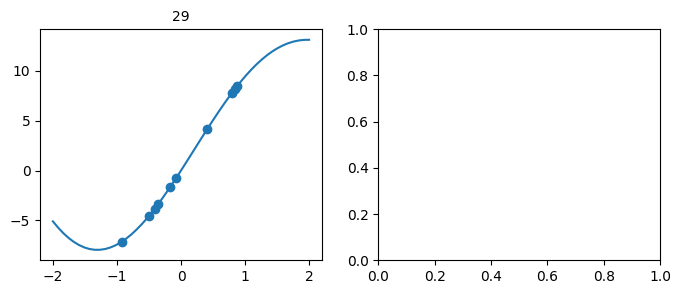

In [34]:
Genetic(Robots)